The necessary python libraries are:

- **Numpy** --> is used for math operations
- **pyplot** --> from matplotlib is used to visualize the results
- **pandas** --> is used to read the dataset
- **tensorflow** --> is a deep learning framework
- **keras** --> is a deep learning framework

In [ ]:
# Tensorflow is developed by GOOGLE
# Tensorflow language is always based on tensors
# list --- arrays --- tensors (vector representation)
# Writing only tensorflow code is little tricky
# So we use Keras as backend of tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.17.0


**Here we are loading the fashion_mnist dataset from keras**

In [ ]:
dir(keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'california_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [ ]:
mnist = keras.datasets.fashion_mnist
# The dataset is dowmloaded in TFModuleWrapper
mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [ ]:
type(mnist)

module

Step-1: Model.sequential --> Input, Hidden, Output

Step-2. Model.summary --> No of parameters

Step-3. Model.compile --> What optimizer, loss, metrics to use

Step-4. Model.fit --> How many epochs, batch_size, VERBOSE

Step-5. Model.evaluate --> Evaluate test data

- Now we load the data into real variables using load_data()
- It returns 2 tuples.
- The first tuple --> Training data
- The second tuple --> Testing data

In [ ]:
mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train : train images
# Y_train : train labels

# X_test : test images
# Y_test : test labels

The data contist of image which means it has pixel values

In [ ]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 60k images has size of 28x28=784 pixel values
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
X_train[0]
# There are 28 lists will be available
# In each list 28 values will be there
# The shape will become 28x28
X_train[0].shape

(28, 28)

In [ ]:
len(X_train[1]) # each list has 28 values

28

In [ ]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,
          0,   0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230,
        147, 239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,
          0, 194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,
          0, 162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,
         46, 162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  70, 228, 213, 220, 224,
        252, 239, 219, 217, 231, 171,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 214, 218, 216,
        210, 215, 217, 202, 224, 172,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  24, 254, 214, 210, 211,
        214, 215, 212, 203, 221, 167,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 254, 216, 215, 217,
        217, 216, 216, 206, 225, 150,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        216, 214, 212, 203, 226, 136,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 245, 216, 214, 216,
        217, 215, 211, 204, 225, 125,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 247, 216, 214, 217,
        220, 217, 213, 203, 222, 147,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 216, 215, 218,
        222, 216, 214, 207, 218, 179,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 216, 217, 219,
        222, 217, 214, 210, 215, 211,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 255, 214, 218, 219,
        224, 218, 215, 211, 211, 231,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  79, 227, 209, 219, 219,
        227, 219, 215, 213, 206, 254,  58,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 146, 226, 211, 220, 219,
        228, 218, 215, 216, 205, 219, 163,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202, 221, 214, 221, 219,
        231, 218, 215, 218, 213, 212, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 234, 217, 216, 220, 219,
        234, 217, 215, 218, 216, 223, 247,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  17, 254, 212, 219, 219, 220,
        233, 214, 216, 219, 222, 153, 238,  58,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  66, 255, 208, 220, 219, 222,
        241, 220, 218, 218, 218, 192, 242,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142, 235, 203, 218, 216, 231,
        242, 225, 233, 219, 214, 216, 238, 144,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177, 248, 227, 229, 211, 255,
         76,   0, 247, 243, 230, 230, 249, 187,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
Y_train[:5]
# X_train[0] --> 9 Shoe
# X_train[1] --> 0 Shirt
# X_train[2] --> 0 Top
# X_train[3] --> 3 Dress
# X_train[4] --> 0

# Total 60k images
# That divides into 10 classes

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
Y_train
# Multi-classification

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Generally this is not available

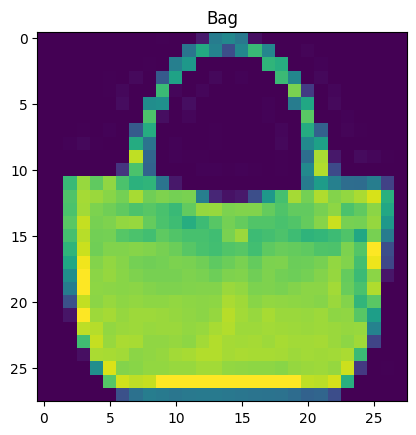

In [ ]:
plt.imshow(X_train[100]) # Comperssed image
plt.title(class_names[Y_train[100]])
plt.show()

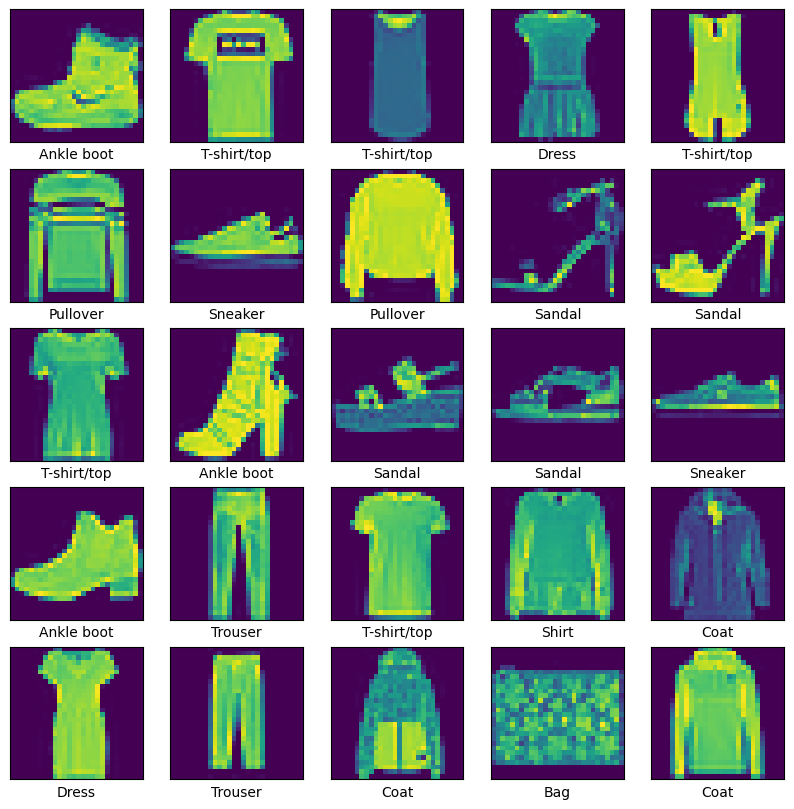

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25): # 25 images
    plt.subplot(5,5,i+1) # 25 plots i=2 5,5,2
    plt.xticks([]) # Removes numbers around the image
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i]])
plt.show()

**Normalization**

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

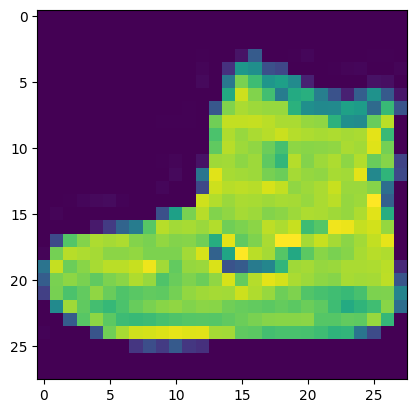

In [ ]:
plt.imshow(X_train[0])

- We read the data
- Understand the values
- Understand shape of data
- We plot the data
- Understand labels of data

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Input layer
model.add(Dense(128, activation='relu')) # Hidden layer
model.add(Dense(10, activation='softmax')) # Output layer
# No of parameters = 101770

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Model Compile**

In [ ]:
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [ ]:
60000/32 # 32 images we want to pass
# How many batches?

1875.0

**Model Fit**

In [ ]:
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=64,
          verbose=True)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7716 - loss: 0.6639
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8545 - loss: 0.4042
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8729 - loss: 0.3479
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8803 - loss: 0.3303
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8857 - loss: 0.3052
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8943 - loss: 0.2847
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8995 - loss: 0.2759
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9028 - loss: 0.2623
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9057 - loss: 0.2581
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9078 - loss: 0.2505


**Hyper Parameters**
- No of hidden layers
- No of Neurons
- Optimizer
- Loss
- Accuracy
- Epochs
- Batch_size
- Learning rate

**Model Evaluate**

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8815 - loss: 0.3417
0.8808000087738037


**Model Predictions**

In [ ]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.13912677e-07, 3.48516904e-09, 5.07105824e-08, ...,
        2.23794486e-03, 3.58930288e-06, 9.96680379e-01],
       [2.52212794e-05, 9.29802042e-15, 9.80120063e-01, ...,
        2.79700189e-14, 1.62908222e-07, 2.07073421e-12],
       [4.90723942e-05, 9.99937594e-01, 1.97113081e-06, ...,
        1.14849578e-15, 1.15215844e-10, 4.47374478e-13],
       ...,
       [2.14326181e-04, 2.64599002e-11, 1.86302259e-05, ...,
        2.03537027e-08, 9.99738574e-01, 4.82253126e-12],
       [4.43388153e-08, 9.99796629e-01, 6.93957816e-08, ...,
        3.99389853e-12, 5.93662763e-09, 3.62446362e-09],
       [1.07449479e-04, 2.29533725e-08, 9.47315857e-06, ...,
        7.73947220e-04, 1.15650182e-04, 1.72638120e-05]], dtype=float32)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_pred[0] # Total 10k predictions
# We are taking first prediction

array([1.1391268e-07, 3.4851690e-09, 5.0710582e-08, 2.3445729e-08,
       2.4325232e-07, 1.0772164e-03, 5.3347179e-07, 2.2379449e-03,
       3.5893029e-06, 9.9668038e-01], dtype=float32)

In [ ]:
max = np.max(y_pred[0])
max

0.9966804

In [ ]:
np.argmax(y_pred[0])

9

In [ ]:
Y_test[0]

9

In [ ]:
class_names[Y_test[0]]

'Ankle boot'

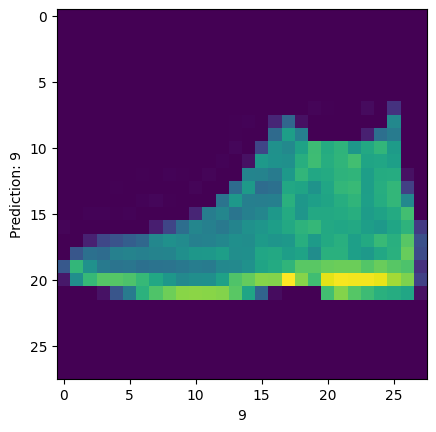

In [ ]:
plt.imshow(X_test[0])
plt.xlabel(Y_test[0])
plt.ylabel(f'Prediction: {np.argmax(y_pred[0])}')
plt.show()

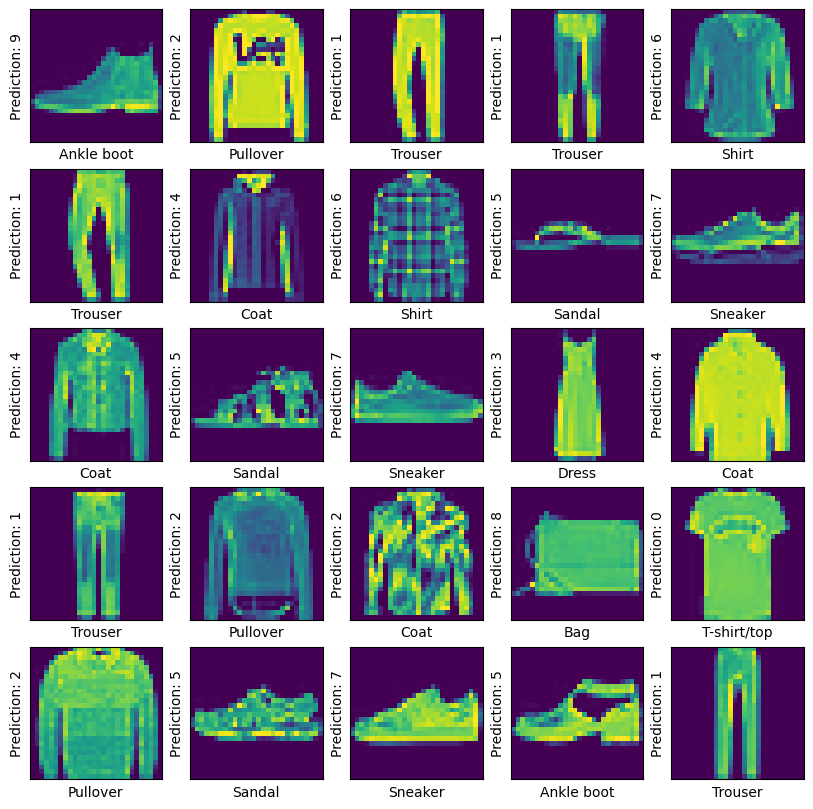

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(class_names[Y_test[i]])
    plt.ylabel(f'Prediction: {np.argmax(y_pred[i])}')
plt.show()

- Model creation

  - sequential
  - add
  - dense
- Model compile

  - Optimizer
  - Loss (Cross entropy)
  - Metrics (Accuracy)
- Model Fit

  - X_train
  - Y_train
  - epochs
  - batch_size
- Model evaluation

  - On the test data what are the metrics & loss
  - X_test
  - Y_test
- Model predictions

  - X_test
  - Probabilities values will be provided (argmax)

**Fine Tunning**

- By increasing Hidden Layers
- By increasing neurons
- By changing optimizer
- By changing Epochs
- By adding drop out technique

In [ ]:
#ML models are handovered to client by pickle or joblib
# Any DL models means weight file
# Saved by entire model or only weights

**Save the model**

In [ ]:
len(model.weights[3].numpy())

10

In [ ]:
model

<Sequential name=sequential, built=True>

In [ ]:
# Save full model
model.save('Ann.keras')
# model name: model
# Name = Ann

In [ ]:
from tensorflow.keras.models import load_model

# load the model
loaded_model = load_model('Ann.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

**Total params**: Trainable + Non-Trainable params

**Trainable params**: Parameters that the model will adjust during training

**Non-Trainable params**: Parameters that do not change during training

**Optimizer params**: Parameters used by the optimizers, which may include internal state or configurations.

In [ ]:
# Save the weights
# Model name: model
# .h5 format
model.save_weights('model_weights.weights.h5') # Added .weights to the filename

In [ ]:
# Restore the weights
model.load_weights('model_weights.weights.h5')

# Evaluate on unseen data

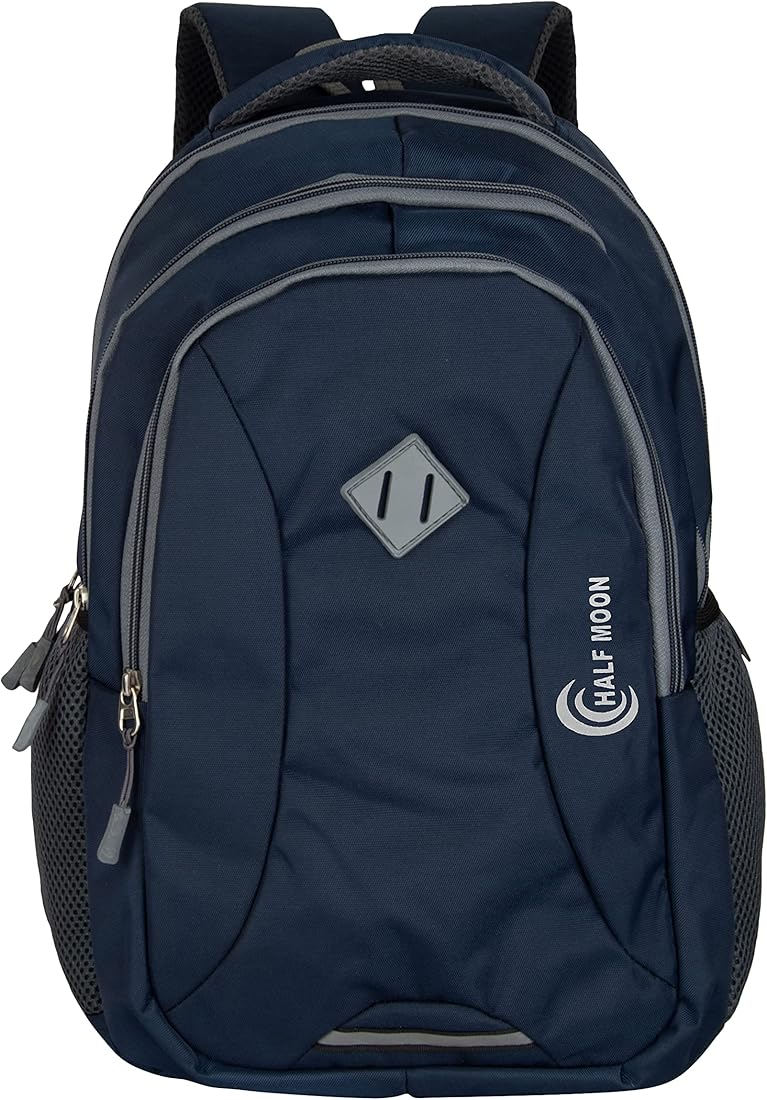

In [ ]:
from PIL import Image
import numpy as np
img = Image.open('/content/bag.jpg')
img

In [ ]:
img1 = np.array(img)
img1.shape

(1100, 767, 3)

In [ ]:
img2 = img.resize((28,28))
img2

In [ ]:
img3 = np.array(img2)
img3.shape

(28, 28, 3)

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
# Convert into gray image
# optional
gray_image = np.mean(img3, axis=2) # (28,28)
gray_image.shape

(28, 28)

In [ ]:
# Scale the image
scaled_image = gray_image/255
scaled_image.shape

(28, 28)

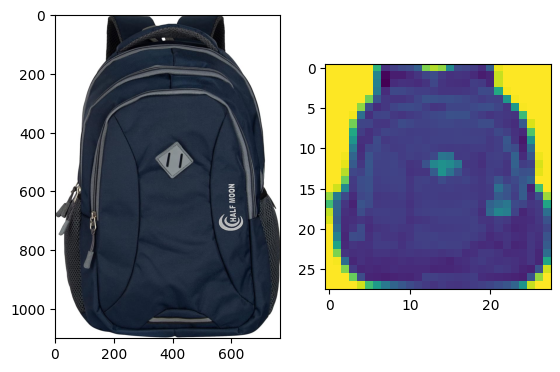

In [ ]:
plt.subplot(1,2,1).imshow(img)
plt.subplot(1,2,2).imshow(scaled_image)
plt.show()

In [ ]:
X_train.shape # In model we pass whole X_train

(60000, 28, 28)

In [ ]:
# Reshape image according to model
scaled_image_final = scaled_image.reshape(1,28,28)
scaled_image_final.shape

(1, 28, 28)

In [ ]:
pred = model.predict(scaled_image_final)
np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


8

In [ ]:
class_names[np.argmax(pred)]

'Bag'